In [3]:
%matplotlib notebook

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
%run Analise_survey.ipynb

In [5]:
def visual (data, k):
    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init="k-means++", n_clusters=k, n_init=2)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        "K-means clustering on the digits dataset (PCA-reduced data)\n"
        "Centroids are marked with white cross"
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [6]:
dados.head()

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,3300,0,24.0,5.0,2,2,0,2,0,3,4,0,0.0,2,7.0,9.0,36.0,2
1,22000,0,12.0,5.0,0,1,1,3,0,4,4,1,8.0,1,7.0,8.0,60.0,0
2,22000,0,30.0,9.0,0,4,0,0,4,3,0,1,0.0,2,7.0,8.0,24.0,0
3,16500,0,24.0,4.0,0,0,0,3,3,4,0,1,1.0,2,10.0,10.0,36.0,1
4,22000,1,12.0,10.0,0,0,0,3,2,4,0,4,8.0,2,0.0,0.0,36.0,0


In [7]:
#lista de varíaveis do cluster
lista_variaveis = ['RENDA','PROFISSAO','TEMPO_ULTIMO_APARELHO', 'IMPORTANCIA','OITO_1','OITO_2','OITO_3','OITO_4','OITO_5','OITO_6','OITO_7','OITO_8','NOVO_ATRAI','PROMOCAO','NOTA_ATUAL','SATISFSACAO_NOVO','TEMPO_ESPERADO','DURACAO_ESPERADA'] 

#dataframe filtrado
df_filter = dados[lista_variaveis]

#preenche Nan com a mediana da coluna
imputer = SimpleImputer(strategy='median')
imputer.fit(df_filter)
temp = imputer.transform(df_filter)
df_filter_nan = pd.DataFrame(temp, columns=df_filter.columns)

In [8]:
df_filter_nan.head()

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA
0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,2.0,7.0,9.0,36.0,2.0
1,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,4.0,4.0,1.0,8.0,1.0,7.0,8.0,60.0,0.0
2,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,2.0,7.0,8.0,24.0,0.0
3,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,1.0,1.0,2.0,10.0,10.0,36.0,1.0
4,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,4.0,8.0,2.0,0.0,0.0,36.0,0.0


In [9]:
df_filter_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RENDA                  159 non-null    float64
 1   PROFISSAO              159 non-null    float64
 2   TEMPO_ULTIMO_APARELHO  159 non-null    float64
 3   IMPORTANCIA            159 non-null    float64
 4   OITO_1                 159 non-null    float64
 5   OITO_2                 159 non-null    float64
 6   OITO_3                 159 non-null    float64
 7   OITO_4                 159 non-null    float64
 8   OITO_5                 159 non-null    float64
 9   OITO_6                 159 non-null    float64
 10  OITO_7                 159 non-null    float64
 11  OITO_8                 159 non-null    float64
 12  NOVO_ATRAI             159 non-null    float64
 13  PROMOCAO               159 non-null    float64
 14  NOTA_ATUAL             159 non-null    float64
 15  SATISF

In [10]:
print("Tenho Nan no dataset: {0}".format(df_filter_nan.isnull().values.any()))

Tenho Nan no dataset: False


In [11]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

In [12]:
#fit no algoritmo
three_means.fit(df_filter_nan)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(n_clusters=3)

In [13]:
saida = three_means.predict(df_filter_nan)

In [14]:
df_filter_nan['cluster'] = saida

In [15]:
df_filter_nan.head()

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,cluster
0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,2.0,7.0,9.0,36.0,2.0,1
1,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,4.0,4.0,1.0,8.0,1.0,7.0,8.0,60.0,0.0,2
2,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,2.0,7.0,8.0,24.0,0.0,2
3,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,1.0,1.0,2.0,10.0,10.0,36.0,1.0,0
4,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,4.0,8.0,2.0,0.0,0.0,36.0,0.0,2


In [16]:
df_filter_nan.cluster.value_counts(True)

2    0.628931
0    0.194969
1    0.176101
Name: cluster, dtype: float64

In [17]:
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = cluster.MiniBatchKMeans(n_clusters=k)
    three_means.fit(df_filter_nan)
    distortions.append(three_means.inertia_)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
D:\anacond\lib\site-packages\sklearn\cluster\_kmeans

In [18]:
distortions

[204563734.30645454,
 205184953.6479039,
 204541434.39401948,
 204434437.27416578,
 204516021.80869377,
 204672379.078915,
 204429974.67604792,
 204538445.4280314,
 204481358.05869016,
 204903995.20977443,
 206487326.43354103,
 204403967.74321544,
 204806413.26944873,
 205292658.90476826,
 204446921.03187644,
 204938686.7187345,
 204705079.629485,
 205331712.2131106,
 204399649.67211893]

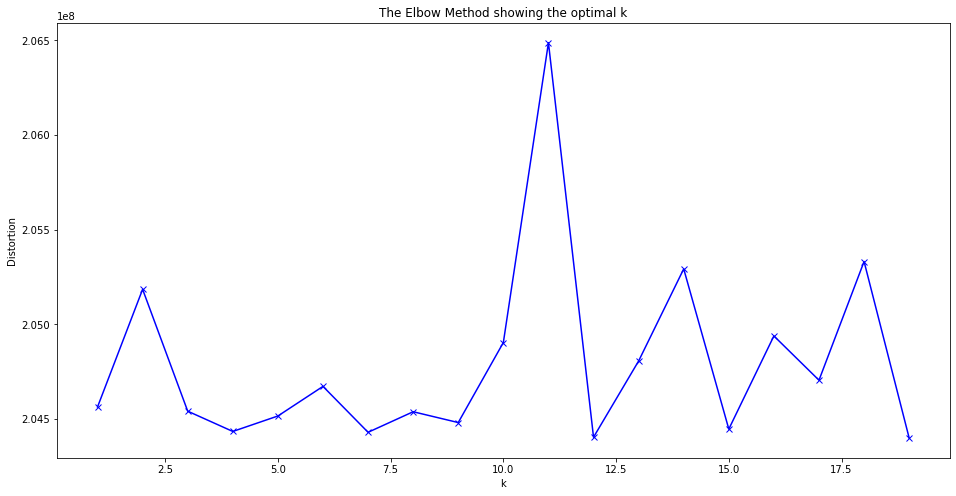

In [19]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=2)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0    0.823899
1    0.176101
Name: cluster, dtype: float64

In [21]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


2    0.628931
0    0.194969
1    0.176101
Name: cluster, dtype: float64

In [22]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=9)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0    0.308176
6    0.238994
2    0.132075
3    0.100629
8    0.081761
7    0.062893
4    0.037736
5    0.025157
1    0.012579
Name: cluster, dtype: float64

In [30]:
#define os pontos no espaço
three_means = cluster.MiniBatchKMeans(n_clusters=3)

#fit no algoritmo
three_means.fit(df_filter_nan)
saida = three_means.predict(df_filter_nan)
df_filter_nan['cluster'] = saida
df_filter_nan.cluster.value_counts(True)

D:\anacond\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0    0.628931
1    0.194969
2    0.176101
Name: cluster, dtype: float64

In [31]:
reduced_data = PCA(n_components=2).fit_transform(df_filter_nan)
kmeans = KMeans(init="k-means++", n_clusters=k, n_init=2)
kmeans.fit(reduced_data)

KMeans(n_clusters=19, n_init=2)

In [32]:
df_filter_nan.head()

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,cluster
0,3300.0,0.0,24.0,5.0,2.0,2.0,0.0,2.0,0.0,3.0,4.0,0.0,0.0,2.0,7.0,9.0,36.0,2.0,2
1,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,4.0,4.0,1.0,8.0,1.0,7.0,8.0,60.0,0.0,0
2,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,2.0,7.0,8.0,24.0,0.0,0
3,16500.0,0.0,24.0,4.0,0.0,0.0,0.0,3.0,3.0,4.0,0.0,1.0,1.0,2.0,10.0,10.0,36.0,1.0,1
4,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,4.0,8.0,2.0,0.0,0.0,36.0,0.0,0


In [33]:
lista = df_filter_nan.cluster.unique().tolist()

In [34]:
lista

[2, 0, 1]

In [38]:
cluster0 = df_filter_nan.loc[df_filter_nan['cluster']==0]
cluster0

,RENDA,PROFISSAO,TEMPO_ULTIMO_APARELHO,IMPORTANCIA,OITO_1,OITO_2,OITO_3,OITO_4,OITO_5,OITO_6,OITO_7,OITO_8,NOVO_ATRAI,PROMOCAO,NOTA_ATUAL,SATISFSACAO_NOVO,TEMPO_ESPERADO,DURACAO_ESPERADA,cluster
1,22000.0,0.0,12.0,5.0,0.0,1.0,1.0,3.0,0.0,4.0,4.0,1.0,8.0,1.0,7.0,8.0,60.0,0.0,0
2,22000.0,0.0,30.0,9.0,0.0,4.0,0.0,0.0,4.0,3.0,0.0,1.0,0.0,2.0,7.0,8.0,24.0,0.0,0
4,22000.0,1.0,12.0,10.0,0.0,0.0,0.0,3.0,2.0,4.0,0.0,4.0,8.0,2.0,0.0,0.0,36.0,0.0,0
6,22000.0,0.0,48.0,10.0,2.0,4.0,2.0,0.0,1.0,2.0,0.0,1.0,7.0,2.0,7.0,7.0,36.0,0.0,0
7,22000.0,0.0,42.0,4.0,1.0,3.0,0.0,3.0,1.0,2.0,4.0,0.0,3.0,2.0,7.0,9.0,36.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22000.0,0.0,36.0,6.0,3.0,4.0,1.0,1.0,4.0,0.0,0.0,0.0,8.0,2.0,7.0,7.0,28.0,0.0,0
154,22000.0,1.0,36.0,4.0,3.0,4.0,0.0,2.0,2.0,2.0,0.0,0.0,4.0,2.0,10.0,10.0,40.0,0.0,0
155,22000.0,0.0,15.0,9.0,2.0,3.0,0.0,2.0,2.0,2.0,3.0,0.0,7.0,2.0,8.0,6.0,36.0,0.0,0
156,22000.0,0.0,34.0,0.0,4.0,4.0,2.0,4.0,0.0,4.0,0.0,0.0,6.0,2.0,10.0,10.0,36.0,1.0,0


In [40]:
df_filter_nan.to_excel("teste.xlsx")